In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN

In [2]:
df = pd.read_csv('dataset_NN.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1


In [3]:
preprocessor = SimplePreprocessor()

In [4]:
X.head()

,att1,att2,att3,att4,att5,att6
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [5]:
att_list = ['att4', 'att5', 'att6']
X = preprocessor.Standardize(X, att_list)

In [6]:
X.head()

,att1,att2,att3,att4,att5,att6
0,1.0,0.0,0.0,-0.930348,-1.125501,-1.206871
1,1.0,0.0,0.0,-1.187285,-1.156216,-1.209768
2,1.0,0.0,0.0,-1.009397,-1.100311,-1.220508
3,1.0,0.0,0.0,-1.077170,-1.265605,-1.186956
4,1.0,0.0,0.0,-1.165774,-1.063905,-1.199553


In [7]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
y = preprocessor.OneHot(y)

In [9]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [10]:
X_train, X_test, y_train, y_test =preprocessor.train_test_split(X.T, y)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 1400), (6, 600), (10, 1400), (10, 600))

In [12]:
layer_dims = [X_train.shape[0], 100, 50, y_train.shape[0]]
model1 = DNN(layer_dims, lRate=0.015, n_iters=300,activation='ReLu', GD_type='MiniBatchGD', batch_size=128)

('Layer 1 W shape : (100, 6)', 'b shape : (100, 1)')
('Layer 2 W shape : (50, 100)', 'b shape : (50, 1)')
('Layer 3 W shape : (10, 50)', 'b shape : (10, 1)')


In [13]:
costs = model1.fit(X_train, y_train, print_cost=True)

Cost after iteration0: 0.18892234643243005
Cost after iteration10: 0.14039413395523928
Cost after iteration20: 0.11502127576208128
Cost after iteration30: 0.09838503883000355
Cost after iteration40: 0.08704975543583061
Cost after iteration50: 0.07895287657958443
Cost after iteration60: 0.07289566729935351
Cost after iteration70: 0.06819827761554953
Cost after iteration80: 0.06446164953603979
Cost after iteration90: 0.06142596195211592
Cost after iteration100: 0.05892489794224673
Cost after iteration110: 0.0568406847003356
Cost after iteration120: 0.055081979639857934
Cost after iteration130: 0.0535805154260834
Cost after iteration140: 0.05228513552327481
Cost after iteration150: 0.05115648915138708
Cost after iteration160: 0.05016437200001137
Cost after iteration170: 0.04928478314829779
Cost after iteration180: 0.04849974974574055
Cost after iteration190: 0.04779382776836749
Cost after iteration200: 0.04715305167389317
Cost after iteration210: 0.0465704354007718
Cost after iteration220

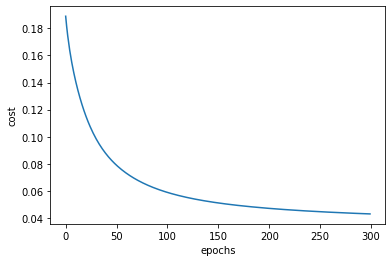

In [14]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

In [15]:
model2 = DNN(layer_dims, lRate=0.015, n_iters=3000,activation='ReLu', GD_type='BatchGD')

('Layer 1 W shape : (100, 6)', 'b shape : (100, 1)')
('Layer 2 W shape : (50, 100)', 'b shape : (50, 1)')
('Layer 3 W shape : (10, 50)', 'b shape : (10, 1)')


In [16]:
costs2 = model2.fit(X_train, y_train, print_cost=True)

Cost after iteration0: 2.306464958431857
Cost after iteration100: 0.8284805711979562
Cost after iteration200: 0.6638761121705766
Cost after iteration300: 0.6084945567355483
Cost after iteration400: 0.577498261023922
Cost after iteration500: 0.5572572067437714
Cost after iteration600: 0.5427024851120326
Cost after iteration700: 0.5313916348123459
Cost after iteration800: 0.5221014765425689
Cost after iteration900: 0.5141247294608682
Cost after iteration1000: 0.5071002252285403
Cost after iteration1100: 0.5009133861247316
Cost after iteration1200: 0.4954824822556525
Cost after iteration1300: 0.4906352709724412
Cost after iteration1400: 0.4863479591889315
Cost after iteration1500: 0.4825226112005394
Cost after iteration1600: 0.4790516290539299
Cost after iteration1700: 0.47590756115394234
Cost after iteration1800: 0.4731170706165215
Cost after iteration1900: 0.4706165340601117
Cost after iteration2000: 0.46836434630322077
Cost after iteration2100: 0.46633177166796164
Cost after iteration2

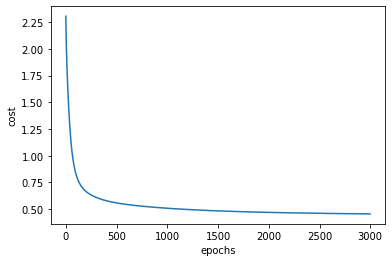

In [17]:
plt.plot(np.squeeze(costs2))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()